### Librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import unidecode


### Lectura de datos

Contamos con los titulares de noticias en un archivo txt, lo leemos con pandas y los mostramos.
- Vemos Zika, virus no conocido, Rabies, Rotavirus.
- De df.sample() vemos Measles, Hepatitis, Norovirus, Tuberculosis, Chikungunya, Bronchitis, Rhinovirus, Malaria, Dengue, Pneumonia, Herpes, HIV, Mad Cow, Chickenpox, Chlamydia, West Nile Virus, Swine Flu, Meningitis, etc.

In [2]:
df = pd.read_fwf('headlines.txt')
df.columns = ['Headlines']
df

,Headlines
0,Could Zika Reach New York City?
1,First Case of Zika in Miami Beach
2,"Mystery Virus Spreads in Recife, Brazil"
3,Dallas man comes down with case of Zika
4,Trinidad confirms first Zika case
...,...
644,Rumors about Rabies spreading in Jerusalem hav...
645,More Zika patients reported in Indang
646,Suva authorities confirmed the spread of Rotav...
647,More Zika patients reported in Bella Vista


In [3]:
df.sample()

,Headlines
205,Oxford tests new cure for HIV


Se sacan los 'acentos' a los headlines

In [4]:
df['Headlines'] = df['Headlines'].apply(unidecode.unidecode)
headlines = df['Headlines'].tolist()
decoded_headlines = [unidecode.unidecode(headline) for headline in headlines]
decoded_headlines[-4:]

['More Zika patients reported in Indang',
 'Suva authorities confirmed the spread of Rotavirus',
 'More Zika patients reported in Bella Vista',
 'Zika Outbreak in Wichita Falls']

### Listas de países y ciudades usando GeonamesCache

In [41]:
import geonamescache
gc = geonamescache.GeonamesCache()
Countries = [Country['name'] for Country in gc.get_countries().values()]
Countries[:10]

['Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Anguilla',
 'Albania',
 'Armenia',
 'Angola',
 'Antarctica',
 'Argentina']

In [42]:
Cities = [City['name'] for City in gc.get_cities().values()]
Cities[:10]

['les Escaldes',
 'Andorra la Vella',
 'Umm Al Quwain City',
 'Ras Al Khaimah City',
 'Zayed City',
 'Khawr Fakkān',
 'Dubai',
 'Dibba Al-Fujairah',
 'Dibba Al-Hisn',
 'Sharjah']

### Se buscan las ciudades duplicadas

In [7]:
from collections import Counter

city_counts = Counter(Cities)
city_counts.most_common(10)

[('Richmond', 9),
 ('San Pedro', 8),
 ('San Fernando', 8),
 ('Springfield', 8),
 ('Victoria', 7),
 ('Santa Rosa', 7),
 ('Santa Cruz', 7),
 ('La Unión', 7),
 ('San Vicente', 6),
 ('San Lorenzo', 6)]

Usando nuevamente unidecode se sacan los acentos a los países y ciudades, esto haciendo match entre las palabras con y sin acento.

In [8]:
#se le sacaran los acentos a los nombres que son como: 'Bāzār-e Yakāwlang y se les hace match como dando el sin acentuar

country_accent_mapping = {
    unidecode.unidecode(Country): Country for Country in Countries
}
city_accent_mapping = {
    unidecode.unidecode(City): City for City in Cities
}
city_accent_mapping["Bazar-e Yakawlang"]

'Bāzār-e Yakāwlang'

Se busca cuantas ciudades y países hay que en los titulares.

In [9]:
unaccented_cities = list(city_accent_mapping.keys())
unaccented_countries = set(country_accent_mapping.keys())

print(f"There are {len(unaccented_cities)} cities to look through.")
print(f"There are {len(unaccented_countries)} countries to look through.")

There are 24917 cities to look through.
There are 252 countries to look through.


### Match de palabras

Usando regular expressions se busca poder hacer match para buscar las ciudades, que haga match con palabras enteras y que luego si hay ciudades qwue contienen palabras similares, como las iniciadas con 'San', se ordenen de ciudades con nombres más largos a nombres más cortos, así buscará primero la ciudad con nombre más largo y hará match.

In [10]:
import re
problem_city = 'San Jose'
re.search('\\bSan\\b|\\bSan Jose\\b', problem_city)

<re.Match object; span=(0, 3), match='San'>

In [11]:
re.search('\\bSan Jose\\b|\\bSan\\b', problem_city)

<re.Match object; span=(0, 8), match='San Jose'>

Se ordenan países y ciudades de nombre más largo a nombre más corto.

In [12]:
unaccented_cities = sorted(unaccented_cities, key=lambda x: len(x), reverse=True)
unaccented_cities[:2]

['Sandaoling Lutiankuang Wuqi Nongchang',
 'Sant Pere, Santa Caterina i La Ribera']

In [13]:
unaccented_countries = sorted(unaccented_countries, key=lambda x: len(x), reverse=True)
unaccented_countries[:2]

['South Georgia and the South Sandwich Islands',
 'United States Minor Outlying Islands']

Asegurar que se hará match en palabras enteras y no solo en palabras a medias, como las ciudades con 'San'.

In [14]:
city_regex = r'\b|\b'.join(unaccented_cities)
city_regex[1500:1800]

'icina i la Torre Llobeta\\b|\\bSaint-Maximin-la-Sainte-Baume\\b|\\bTamuning-Tumon-Harmon Village\\b|\\bTultitlan de Mariano Escobedo\\b|\\bSan Bernardino Tlaxcalancingo\\b|\\bSan Francisco Tlalcilalcalpan\\b|\\bFraccionamiento Ciudad Olmeca\\b|\\bPresidencia Roque Saenz Pena\\b|\\bAgincourt South-Malvern West\\b|\\bZ'

Se prueba que funcionó el hacer el match con titulares random, donde se nota que en cada titular se logró encontrar y separar la ciudad donde sucede.

In [15]:
np.random.seed(50)

test_headlines = np.random.choice(np.ravel(df), 10)

for test_headline in test_headlines:
    print(test_headline)
    match = re.search(city_regex, test_headline)
    if match:
        print(match.group(0), "\n")

Tupelo Residents Recieve Syphilis vaccine
Tupelo 

Rabies Exposure in Hamilton
Hamilton 

Zika case reported in Rizal
Rizal 

Zika cases concern Charlotte residents
Charlotte 

Pune woman diagnosed with Zika
Pune 

Vericella spreading in Ibadan
Ibadan 

Pune woman diagnosed with Zika
Pune 

Mad Cow Disease Hits Rotterdam
Rotterdam 

Batangas Tourism Takes a Hit as Virus Spreads
Batangas 

Zika symptoms spotted in Hollywood
Hollywood 



Se hace el mismo procedimiento pero con países.

In [16]:
country_regex = r"\b|\b".join(unaccented_countries)
country_regex[:100]

'South Georgia and the South Sandwich Islands\\b|\\bUnited States Minor Outlying Islands\\b|\\bBonaire, S'

Pero, hay un problema que es que no hay match con países, y esto se puede deber a que no hay una suficiente cantidad de países nombrados en los titulares, lo que hace difícil la función del match.

In [17]:
np.random.seed(100)
test_headlines = np.random.choice(np.ravel(df), 10)

for test_headline in test_headlines:
    print(test_headline)
    match = re.search(country_regex, test_headline)
    if match:
        print(match.group(0), "\n")

Outbreak of Zika in Leesburg
Authorities are Worried about the Spread of Mad Cow Disease in Rome
More people in Berkeley are infected with Swine Flu every year
Seattle scientists get $500,000 grant to pursue Zika vaccine New 7:50 pm
Zika seminars in Yuma County
Will Rotavirus vaccine help Addis Ababa?
West Nile Virus Hits Yogyakarta
Varicella re-emerges in Lagos
The Spread of Rhinovirus in Boardman has been Confirmed
Fayetteville authorities confirmed the spread of HIV


Se prueba que cuando hay una ciudad y país en el mismo titular, el programa es capaz de detectar ambos y mostrarlos.

In [18]:
line_index = 2
test_headline = str(df.iloc[line_index])
print(test_headline)
print(re.search(city_regex, test_headline).group(0))
print(re.search(country_regex, test_headline).group(0))

Headlines    Mystery Virus Spreads in Recife, Brazil
Name: 2, dtype: object
Recife
Brazil


In [19]:
print(city_accent_mapping["Recife"])
print(country_accent_mapping["Brazil"])

Recife
Brazil


Se crea una función que tome los titulares y busque los países y ciudades usando regular expressions. Si no hay una ciudad o país, escribe None. 

In [20]:
def find_city_and_country_in_headline(Headlines):
    city_match = re.search(city_regex, str(Headlines))
    country_match = re.search(country_regex, str(Headlines))
    Cities = None if not city_match else city_match.group(0)
    Countries = None if not country_match else country_match.group(0)
    return dict(Headlines=Headlines, Countries=Countries, Cities=Cities)

In [21]:
find_city_and_country_in_headline(df.iloc[2])

{'Headlines': Headlines    Mystery Virus Spreads in Recife, Brazil
 Name: 2, dtype: object,
 'Countries': 'Brazil',
 'Cities': 'Recife'}

In [22]:
find_city_and_country_in_headline(df.iloc[1])

{'Headlines': Headlines    First Case of Zika in Miami Beach
 Name: 1, dtype: object,
 'Countries': None,
 'Cities': 'Miami Beach'}

Se aplica lo anterior pero para todos los titulares.

In [40]:
headline_cities_and_countries = [
    find_city_and_country_in_headline(headline) for headline in df['Headlines']
]
headline_cities_and_countries[-10:]


[{'Headlines': 'Authorities are Worried about the Spread of Varicella in Clovis',
  'Countries': None,
  'Cities': 'Clovis'},
 {'Headlines': 'More Zika patients reported in Fort Worth',
  'Countries': None,
  'Cities': 'Fort Worth'},
 {'Headlines': 'Zika symptoms spotted in Boynton Beach',
  'Countries': None,
  'Cities': 'Boynton Beach'},
 {'Headlines': 'Outbreak of Zika in Portoviejo',
  'Countries': None,
  'Cities': 'Portoviejo'},
 {'Headlines': 'Influenza Exposure in Muscat',
  'Countries': None,
  'Cities': 'Muscat'},
 {'Headlines': 'Rumors about Rabies spreading in Jerusalem have been refuted',
  'Countries': None,
  'Cities': 'Jerusalem'},
 {'Headlines': 'More Zika patients reported in Indang',
  'Countries': None,
  'Cities': 'Indang'},
 {'Headlines': 'Suva authorities confirmed the spread of Rotavirus',
  'Countries': None,
  'Cities': 'Suva'},
 {'Headlines': 'More Zika patients reported in Bella Vista',
  'Countries': None,
  'Cities': 'Bella Vista'},
 {'Headlines': 'Zika Ou

Se guardarán los datos en formato JSON, esto por la facilidad de lectura y dado que ha sido mas conveniente. Se comprueba que se guardó bien.

In [24]:
import json
save_file = "headline_cities_and_countries.json"
with open(save_file, "w") as fout:
    fout.write(json.dumps(headline_cities_and_countries))

In [25]:
with open(save_file, "r") as fin:
    check_data = json.loads(fin.read())
check_data[-10:]

[{'Headlines': 'Authorities are Worried about the Spread of Varicella in Clovis',
  'Countries': None,
  'Cities': 'Clovis'},
 {'Headlines': 'More Zika patients reported in Fort Worth',
  'Countries': None,
  'Cities': 'Fort Worth'},
 {'Headlines': 'Zika symptoms spotted in Boynton Beach',
  'Countries': None,
  'Cities': 'Boynton Beach'},
 {'Headlines': 'Outbreak of Zika in Portoviejo',
  'Countries': None,
  'Cities': 'Portoviejo'},
 {'Headlines': 'Influenza Exposure in Muscat',
  'Countries': None,
  'Cities': 'Muscat'},
 {'Headlines': 'Rumors about Rabies spreading in Jerusalem have been refuted',
  'Countries': None,
  'Cities': 'Jerusalem'},
 {'Headlines': 'More Zika patients reported in Indang',
  'Countries': None,
  'Cities': 'Indang'},
 {'Headlines': 'Suva authorities confirmed the spread of Rotavirus',
  'Countries': None,
  'Cities': 'Suva'},
 {'Headlines': 'More Zika patients reported in Bella Vista',
  'Countries': None,
  'Cities': 'Bella Vista'},
 {'Headlines': 'Zika Ou

Se guardan los mappings que fueron hechos en un principio, los países y ciudades con accents.

In [26]:
with open("city_accent_mapping.json", "w") as fout:
    fout.write(json.dumps(city_accent_mapping))

In [27]:
with open("country_accent_mapping.json", "w") as fout:
    fout.write(json.dumps(country_accent_mapping))

# Análisis datos geográficos de los países/ciudades

Los datos guardados en formato JSON se pasan directamente a un DataFrame , he ahí su conveniencia. 

In [28]:
data = pd.read_json("headline_cities_and_countries.json")
data = data.replace({None: np.nan})

data.head(10)

,Headlines,Countries,Cities
0,Could Zika Reach New York City?,NaN,New York City
1,First Case of Zika in Miami Beach,NaN,Miami Beach
2,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife
3,Dallas man comes down with case of Zika,NaN,Dallas
4,Trinidad confirms first Zika case,NaN,Trinidad
5,Zika Concerns are Spreading in Houston,NaN,Houston
6,Geneve Scientists Battle to Find Cure,NaN,Geneve
7,The CDC in Atlanta is Growing Worried,NaN,Atlanta
8,Zika Infested Monkeys in Sao Paulo,NaN,Sao Paulo
9,Brownsville teen contracts Zika virus,NaN,Brownsville


In [29]:
data.iloc[3:5]

,Headlines,Countries,Cities
3,Dallas man comes down with case of Zika,NaN,Dallas
4,Trinidad confirms first Zika case,NaN,Trinidad


In [30]:
data = data.rename(columns=dict(Countries="Country", Cities="City"))
data.tail()

,Headlines,Country,City
644,Rumors about Rabies spreading in Jerusalem hav...,NaN,Jerusalem
645,More Zika patients reported in Indang,NaN,Indang
646,Suva authorities confirmed the spread of Rotav...,NaN,Suva
647,More Zika patients reported in Bella Vista,NaN,Bella Vista
648,Zika Outbreak in Wichita Falls,NaN,Wichita Falls


### Se investigan los datos



In [31]:
data.describe()

,Headlines,Country,City
count,649,15,607
unique,646,10,574
top,Spanish Flu Spreading through Madrid,Brazil,Monroe
freq,2,3,4


- Se tienen 649 titulares, 15 países y 607 ciudades. 
- 646 titulares únicos, 10 países y 574 ciudades únicas. 
- También, se ve que hay duplicados, en titulares, países y ciudades, por lo que se deberían eliminar.

Se buscan los duplicados con un value counts.

In [32]:
data["Headlines"].value_counts().sort_values().tail()

More Zika patients reported in Bella Vista    1
More Zika patients reported in Fort Worth     1
Barcelona Struck by Spanish Flu               2
Spanish Flu Outbreak in Lisbon                2
Spanish Flu Spreading through Madrid          2
Name: Headlines, dtype: int64

In [33]:
print(f"There were {len(data)} rows before dropping duplicates.")
data = data.drop_duplicates()
print(f"There are {len(data)} rows after dropping duplicates.")

There were 649 rows before dropping duplicates.
There are 646 rows after dropping duplicates.


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 0 to 648
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Headlines  646 non-null    object
 1   Country    15 non-null     object
 2   City       604 non-null    object
dtypes: object(3)
memory usage: 20.2+ KB


In [35]:
data['Country'].value_counts()

Brazil       3
Malaysia     3
Panama       2
Vietnam      1
Thailand     1
Guatemala    1
Belize       1
Mexico       1
Hong Kong    1
Singapore    1
Name: Country, dtype: int64

<Axes: title={'center': 'Countries'}>

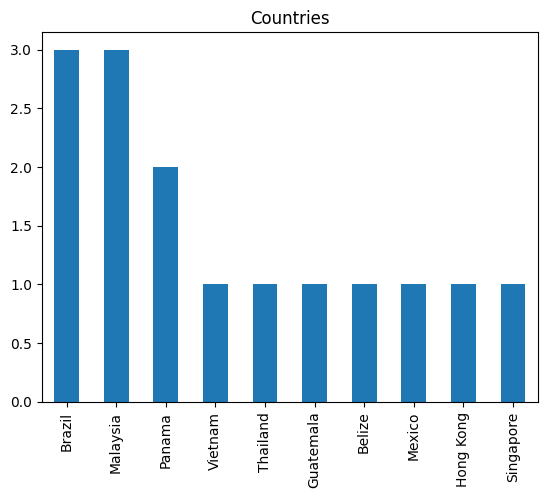

In [36]:
data['Country'].value_counts().plot.bar(title='Countries')

In [37]:
print(f'There are {data["Country"].nunique()} different countries.')
print(f'There are {data["City"].nunique()} different cities.')

There are 10 different countries.
There are 574 different cities.


Las ciudades mas comunes, lo cula también se pudo ver en el describe hecho anteriormente donde se mostraba a Monroe como la ciudad con mayor frecuencia.

In [38]:
data["City"].value_counts().sort_values().tail(10)

Panama City    2
Greenville     2
Melbourne      2
Albany         2
Rochester      2
Ibadan         2
Bedford        2
Madrid         3
Miami          3
Monroe         4
Name: City, dtype: int64

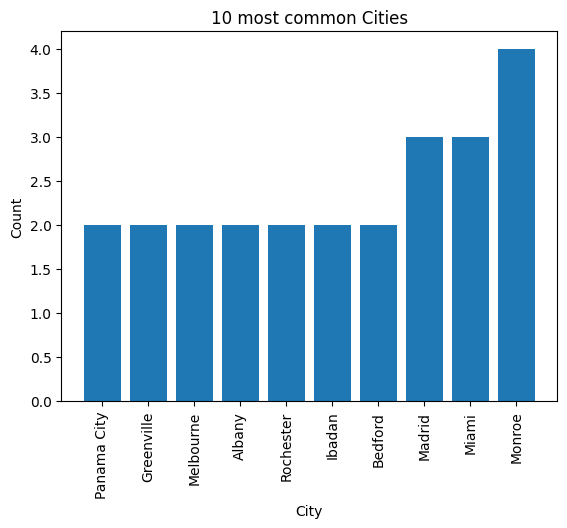

In [39]:
City_counts = data["City"].value_counts().sort_values().tail(10)

plt.bar(City_counts.index, City_counts.values)
plt.title("10 most common Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()